In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Sp/Imagenes_confocal/sp_para entrenar/'
pathlist = Path(path).glob('*.csv')
sparks_data_list = []
for file in pathlist:
    path_in_str = str(file)
    df = pd.read_csv(path_in_str)
    sparks_data_list.append(df)
sparks_data_list = pd.concat(sparks_data_list)
del (sparks_data_list['Unnamed: 0'])
del (sparks_data_list['minim'])
del (sparks_data_list['FWHM'])
del (sparks_data_list['pos_x'])
del (sparks_data_list['pos_y'])
del (sparks_data_list['FDHM'])
del (sparks_data_list['full_width'])
del (sparks_data_list['sparks_tiempo_pico50_2'])
del (sparks_data_list['tiempo_minimo'])

ValueError: No objects to concatenate

In [4]:
print(sparks_data_list.shape)

(2397, 16)


In [5]:
print(sparks_data_list['flag'].unique())

[2. 1.]


In [6]:
sparks_data_list.head()

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


In [7]:
print(sparks_data_list.groupby('flag').size())

flag
1.0    1113
2.0    1284
dtype: int64


/home/leandro/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


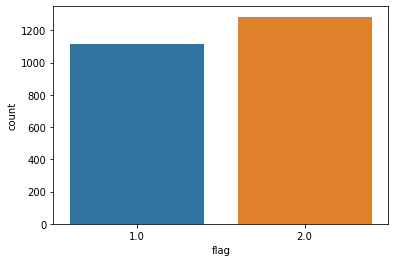

In [8]:
import seaborn as sns
sns.countplot(sparks_data_list['flag'],label="Count")
plt.savefig(path + 'proporcion_flags.png')
plt.show()

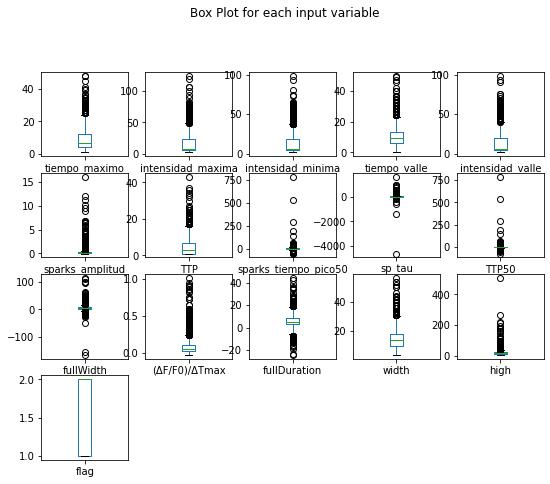

In [9]:
sparks_data_list.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.show()

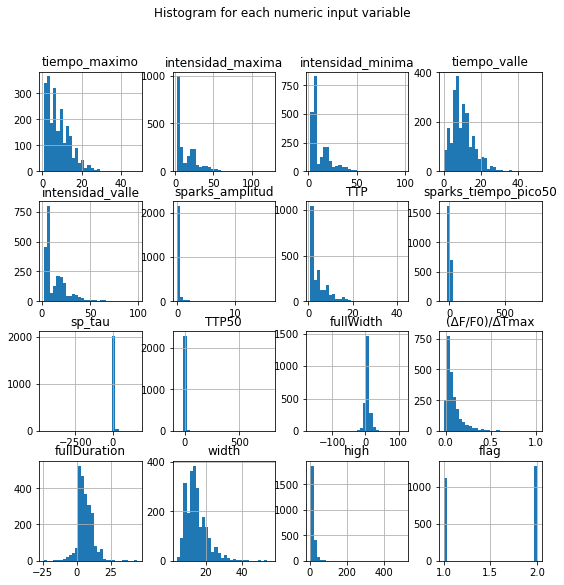

In [10]:
import pylab as pl
sparks_data_list.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
# plt.savefig('fruits_hist')
plt.show()

In [11]:
from matplotlib import cm

feature_names = list(sparks_data_list.columns)
feature_names.remove('flag')
X = sparks_data_list[feature_names]
y = sparks_data_list['flag']

In [12]:
feature_names

['tiempo_maximo',
 'intensidad_maxima',
 'intensidad_minima',
 'tiempo_valle',
 'intensidad_valle',
 'sparks_amplitud',
 'TTP',
 'sparks_tiempo_pico50',
 'sp_tau',
 'TTP50',
 'fullWidth',
 '(ΔF/F0)/ΔTmax',
 'fullDuration',
 'width',
 'high']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Tratamiento de NaN
imp = SimpleImputer(missing_values=np.nan, strategy='median') # Uso la mediana para reemplazar
imp.fit(X_train)
X_train = imp.transform(X_train)

imp.fit(X_test)
X_test = imp.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=9.0)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.60


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.59


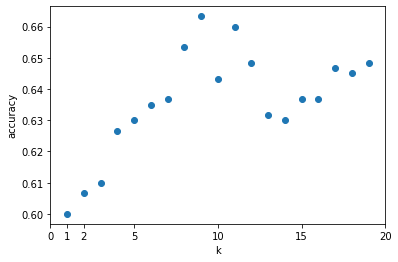

In [24]:
from sklearn.neighbors import KNeighborsClassifier


k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,5,10,15,20])
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='ball_tree')

In [17]:
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.60


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.61
Accuracy of LDA classifier on test set: 0.60


In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

Accuracy of QDA classifier on training set: 0.55
Accuracy of QDA classifier on test set: 0.55


/home/leandro/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.55
Accuracy of GNB classifier on test set: 0.59


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[180 118]
 [122 180]]
              precision    recall  f1-score   support

         1.0       0.60      0.60      0.60       298
         2.0       0.60      0.60      0.60       302

    accuracy                           0.60       600
   macro avg       0.60      0.60      0.60       600
weighted avg       0.60      0.60      0.60       600



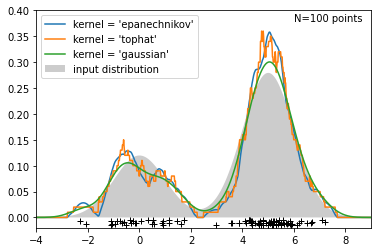

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['epanechnikov', 'tophat', 'gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show() 

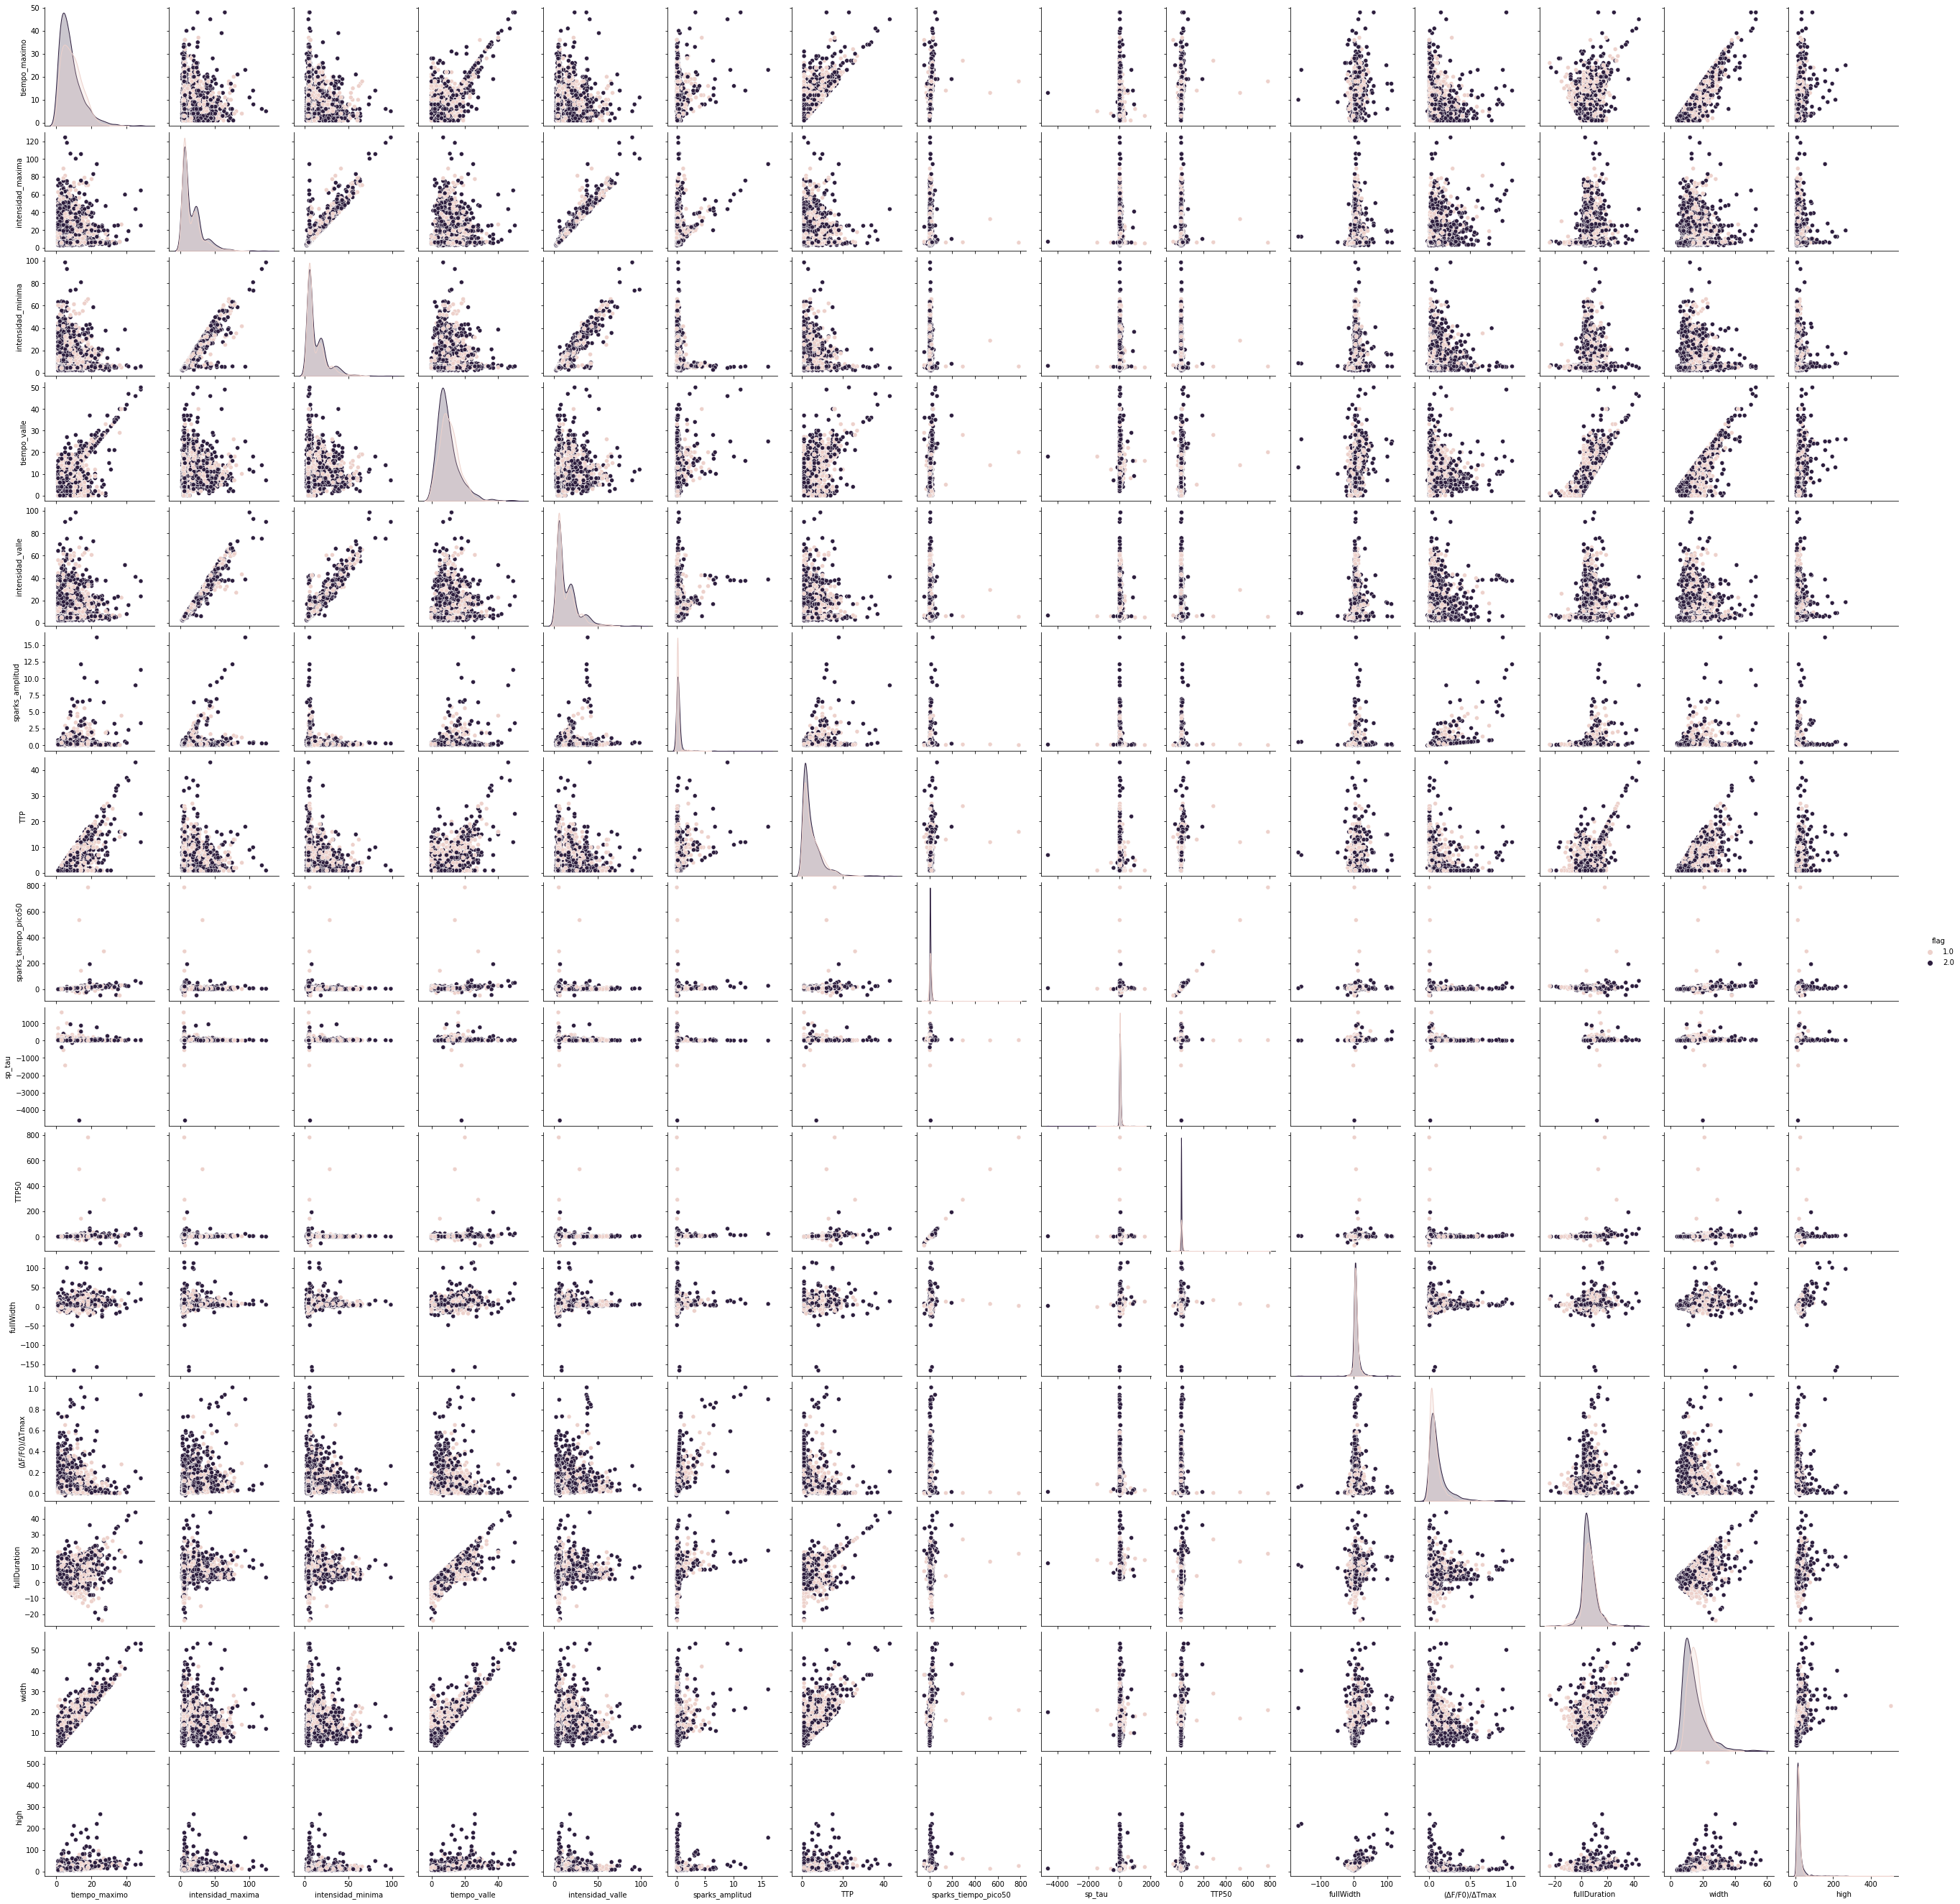

In [25]:
import seaborn as sns

#Levantamos el dataset con las especies correspondientes y graficamos de a pares, con cada punto del color de la especie a la que pertenece.
g = sns.pairplot(sparks_data_list, hue="flag")

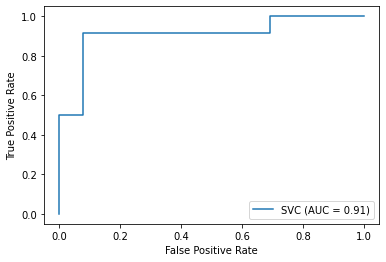

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.savefig(path + 'roc.png')
plt.show()


In [28]:
from sklearn.metrics import average_precision_score
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


In [29]:
y_score

array([ 2.60572257, -2.04772623,  2.09294206, -3.39962774, -0.52972222,
        0.823692  ,  3.01343331, -0.8291283 ,  0.4842301 ,  1.32516583,
        5.09192723, -2.00178651, -2.01724096, -0.84138282, -0.974308  ,
        2.018408  , -4.76042945,  0.04130055, 10.73442528,  6.13406354,
        0.91836468, -2.09773992,  1.97922755, -3.44061827,  0.10700899])

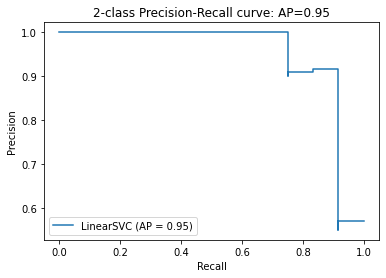

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.savefig(path + 'P-R.png')